In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import numpy as np
from numpy import linalg as LA

In [2]:
import torch
from flair.embeddings import WordEmbeddings
from flair.data import Sentence

C:\Users\Michael\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## TODO: Combine the datasets, analyze users, analyze everything specifically for Arizona
## function modularity

## Read JSON Data

In [3]:
df = pd.read_json("yelp_dataset/yelp_academic_dataset_business.json", lines=True)
print(df.head)

<bound method NDFrame.head of                                                   address  \
0                                       1314 44 Avenue NE   
1                                                           
2                                     1335 rue Beaubien E   
3                                         211 W Monroe St   
4                                     2005 Alyth Place SE   
5                         20235 N Cave Creek Rd, Ste 1115   
6                                          631 Bloor St W   
7                             3417 Derry Road E, Unit 103   
8                                      1440 N. Dysart Ave   
9                                         209 Oakland Ave   
10                                       4568 Highway 7 E   
11                                     595 Markham Street   
12                                        2801 N 15th Ave   
13                                4216 Saint-Laurent Boul   
14                                      4404 14 Street 

[188593 rows x 15 columns]>


In [4]:
len(df)

188593

## Arizona businesses comprise about 1/3 of the dataset
## Why?

In [5]:
arizona_df = df[df['state'] == "AZ"]
len(arizona_df)

56495

In [6]:
def similarity(t1, t2):
    glove_embedding.embed(t1)
    glove_embedding.embed(t2)
    input1, input2 = t1[0].embedding, t2[0].embedding
    a = np.asarray(input1)
    b = np.asarray(input2)
    dot = np.dot(a.flatten(), b.flatten())
    a_mag = LA.norm(a)
    b_mag = LA.norm(b)
    sim = dot / a_mag / b_mag
    return sim

## What are all of the food related words?
## Use Glove word embeddings as a proxy

In [4]:
restaurant_score = []

In [20]:
glove_embedding = WordEmbeddings('glove')
food = Sentence("food")
restaurant_words = ["food", "cafe", "restaurants", "coffee", "drinks", "beer", "bar"]
bar_words = ["beer", "bar", "bars", "brew"]
bar_df = pd.DataFrame()
restaurant_words_objects = []
for word in restaurant_words:
    restaurant_words_objects.append(Sentence(word))

In [25]:
bar_indices = []
for i in range(0, len(df)):
    t = df['categories'][i]
    if t:
        t = t.lower()
        for word in bar_words:
            if word in t:
                bar_indices.append(i)

In [26]:
len(bar_indices)

35659

## 36k Bars and breweries

In [28]:
len(bar_indices) / len(df)

0.18907912806944055

In [31]:
bars_df = df.iloc[bar_indices]

## 20% of the businesses are bars

In [6]:
for i in range(0, len(df)):
    best_score = 0
    score = 0
    if df['categories'][i]:
        for t in df['categories'][i].split(","):
            text = Sentence(t)
            glove_embedding.embed(text)
            for rwo in restaurant_words_objects:
                score = similarity(rwo, text)
                best_score = max(best_score, score)
    restaurant_score.append(best_score)
df['restaurant'] = restaurant_score
df.to_csv("restaurants.csv")

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in float_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df.sort_values(by=['restaurant'], ascending=False)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,restaurant
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB,1.0
143074,"6605 Las Vegas Blvd S, Ste 123","{'BusinessAcceptsCreditCards': 'True', 'Busine...",WtJB0cKBYM21qUF9LonoBg,"Bakeries, Food",Las Vegas,None,0,36.068778,-115.176840,Bon Bread,Southeast,89119,4,4.5,NV,1.0
45732,707 Pavilion Blvd,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",7G8eLlk-zh2SvxfsRKRI1w,"Restaurants, Sandwiches, Food, Mexican",Charlotte,None,1,35.328246,-80.710675,Zac Brown's Southern Ground,,28262,3,2.0,NC,1.0
45736,2526 Jane Street,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",Va0hedZQH9aoMDxuDCZ2qg,"Food, Food Delivery Services",Toronto,None,1,43.739752,-79.513315,Wing Machine,,M3L 2E8,3,2.5,ON,1.0
45744,"9211 N Tryon St, Ste 4","{'BikeParking': 'True', 'BusinessAcceptsCredit...",mv9ml_hdkfaFZOfFumdGBQ,"Food, Bakeries, Ice Cream & Frozen Yogurt",Charlotte,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,35.312181,-80.745841,Insomnia Cookies,University City,28262,49,3.5,NC,1.0
143064,"3743 Las Vegas Blvd S, Ste 121","{'BikeParking': 'False', 'BusinessAcceptsCredi...",Z-v7FStTnqpt0ibzlIbTEA,"Desserts, Food, Ice Cream & Frozen Yogurt, Jui...",Las Vegas,None,0,36.106730,-115.171975,Pineapple Park,The Strip,89109,6,2.0,NV,1.0
143061,1575 E Camelback Rd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",Tbq7eiTMZ4vRY0IrQ0Pn3Q,"Bubble Tea, Desserts, Ice Cream & Frozen Yogur...",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,33.509013,-112.048410,Fried Ice & Bubble Tea,,85014,71,4.0,AZ,1.0
45748,2811 S Market St,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UAcc3oAuCZgnRx7dQejm3g,"Food, Juice Bars & Smoothies",Gilbert,"{'Monday': '6:30-21:0', 'Tuesday': '6:30-21:0'...",1,33.299268,-111.744077,Jamba Juice,,85295,13,4.0,AZ,1.0
143059,"971 64th Avenue NE, Suite 128","{'Alcohol': 'none', 'BikeParking': 'True', 'Bu...",HJy5d7tnvnB2-Md2grIQzw,"Food, Restaurants, Fast Food, Health Markets, ...",Calgary,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,51.110151,-114.040505,Freshii Deerfoot City,,T2E 9B7,3,2.0,AB,1.0
45758,21805 Center Ridge Rd,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",MJhH9GpqswGUI6HcmkYd3Q,"Beer, Wine & Spirits, Food",Rocky River,"{'Monday': '15:0-1:0', 'Tuesday': '15:0-1:0', ...",0,41.458904,-81.861275,Lizardville Beer Store,,44116,23,4.0,OH,1.0


In [9]:
df[df['restaurant'] > 0.9].to_csv("yelp_restaurants.csv")

## Arizona restaurants

In [35]:
yelp_restaurants_df = pd.read_csv("yelp_restaurants.csv")

In [36]:
az_restaurants_df = yelp_restaurants_df[yelp_restaurants_df['state'] == 'AZ']
az_restaurants_df.to_csv("AZ_restaurants.csv")

In [37]:
len(az_restaurants_df)

14542

In [38]:
az_bars_df = bars_df[bars_df['state'] == 'AZ']
az_bars_df.to_csv("AZ_bars.csv")

In [40]:
len(az_bars_df)

7231

## Half the restaurants are bars in Arizona

In [39]:
az_restaurants_df

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,restaurant
3,5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ,1.0
6,8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ,1.0
9,12,2801 N 15th Ave,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ,1.0
15,22,4131 N 83rd Ave,"{'Ambience': ""{'romantic': False, 'intimate': ...",3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,NaN,1,33.495298,-112.236076,Rib Shop,NaN,85033,3,2.5,AZ,1.0
17,24,7745 W Thomas Rd,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,NaN,1,33.479671,-112.225173,Salsitas,NaN,85033,14,2.5,AZ,1.0
27,39,4145 N 83Rd,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",AcGRSWCpb7YB95MTsHlGEw,"Pizza, Fast Food, Restaurants",Phoenix,"{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...",1,33.495422,-112.235798,Little Caesars Pizza,NaN,85033,4,2.0,AZ,1.0
30,47,1111 W Bell Rd,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",cKRMmytHxaSt8F0SMEzKqg,"Event Planning & Services, Soup, Salad, Mexica...",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.639774,-112.087738,Manuel's Mexican Restaurant & Cantina - Bell Rd,NaN,85023,230,3.5,AZ,1.0
46,101,4286 W Thomas Rd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",qBd6uxX63lQuM7lzJ_Xihg,"Beer, Wine & Spirits, Food",Phoenix,NaN,1,33.480792,-112.150881,Jack's Liquor,NaN,85019,4,5.0,AZ,1.0
50,108,6316 N Scottsdale Rd,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",F73T-N5lRNL2Gcpg0Q4KKw,"Food, Restaurants, Italian, Bars, Wine Bars, D...",Scottsdale,"{'Monday': '16:30-21:30', 'Tuesday': '16:30-21...",1,33.530358,-111.925905,Fat Ox,NaN,85253,234,4.0,AZ,1.0
51,109,2515 N Scottsdale Rd,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",SUhBnQdG8MWkmjM6wsnVdw,"Chinese, Bars, Karaoke, Nightlife, Restaurants",Scottsdale,"{'Monday': '12:0-22:30', 'Tuesday': '11:0-23:0...",1,33.475349,-111.925657,Tang Dynasty Restaurant And Bar,NaN,85257,28,3.5,AZ,1.0


In [11]:
az_restaurants_df.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,restaurant
3,5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ,1.0
6,8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ,1.0
9,12,2801 N 15th Ave,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ,1.0
15,22,4131 N 83rd Ave,"{'Ambience': ""{'romantic': False, 'intimate': ...",3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,NaN,1,33.495298,-112.236076,Rib Shop,NaN,85033,3,2.5,AZ,1.0
17,24,7745 W Thomas Rd,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,NaN,1,33.479671,-112.225173,Salsitas,NaN,85033,14,2.5,AZ,1.0


## About 1/3 of Arizona businesses are restaurants in this dataset

## What the embeddings physically look like

In [6]:
# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459,  

## Where are the businesses located?

In [32]:
food_columns = df[df['categories'].str.contains("Food")==True]
print("Number of restaurants", len(food_columns))
df['city'].value_counts()

Number of restaurants 33488


Las Vegas                     28865
Phoenix                       18633
Toronto                       18233
Charlotte                      9204
Scottsdale                     8822
Calgary                        7384
Pittsburgh                     6804
Mesa                           6239
MontrÃ©al                      6045
Henderson                      4815
Tempe                          4492
Chandler                       4272
Madison                        3509
Cleveland                      3506
Glendale                       3469
Gilbert                        3397
Mississauga                    2954
Peoria                         1868
Markham                        1699
North Las Vegas                1508
Champaign                      1243
Scarborough                    1175
North York                     1140
Surprise                       1119
Richmond Hill                   978
Concord                         975
Brampton                        929
Vaughan                     

## Count of restaurants and count of total businesses

In [37]:
restaurants_df = df[df['restaurant'] >= 1]

In [38]:
len(restaurants_df)

27666

In [39]:
len(df)

188593

In [40]:
len(restaurants_df) / len(df)

0.14669685513248107

## 15 % of the businesses are restaurants
## Most are located in Toronto, Las Vegas, and Phoenix

In [41]:
restaurants_df['city'].value_counts()

Toronto                             3805
Las Vegas                           3243
Phoenix                             2052
MontrÃ©al                           1426
Calgary                             1376
Charlotte                           1368
Pittsburgh                          1211
Scottsdale                           802
Cleveland                            656
Madison                              606
Mesa                                 601
Tempe                                540
Mississauga                          532
Henderson                            484
Chandler                             431
Markham                              394
Gilbert                              353
Glendale                             351
North York                           200
Scarborough                          195
Vaughan                              193
North Las Vegas                      191
Richmond Hill                        191
Peoria                               189
Champaign       

## Number of checkins during each day

In [23]:
df_checkin = pd.read_json("yelp_dataset/yelp_academic_dataset_checkin.json", lines=True)
print(df_checkin.head)

<bound method NDFrame.head of                    business_id  \
0       7KPBkxAOEtb3QeIL9PEErg   
1       kREVIrSBbtqBhIYkTccQUg   
2       tJRDll5yqpZwehenzE2cSg   
3       tZccfdl6JNw-j5BKnCTIQQ   
4       r1p7RAMzCV_6NPF0dNoR3g   
5       OVkBMWxUBXGoO4K3_CeJ7g   
6       fW1SKSunVnlaq-fxZ-gSUQ   
7       mDdqgfrvROGAumcQdZ3HIg   
8       nhZ1HGWD8lMErdn3FuWuTQ   
9       vDoXZGE7p6xAkKQ0XQPvoA   
10      8bY6M2yiWOF2ilfmGS34Fw   
11      zNVot5_XHsxwfKdiFjk_aA   
12      BH0K6SxPnY3wTRB7tA27hQ   
13      dPxL6P_Gp74CqSPuL59Srg   
14      aZbbt_RPKV8vUY7GWiEEyw   
15      ioUgJo6Euo0su-dOxUzMqA   
16      Fu-egVPTQZ3lNYM0PhpQiQ   
17      HRIUU2Z4EsZBo59P0I2ZYA   
18      Y6L37i6rkqDzMesTN5UI2Q   
19      WllBAxQd6w3EZHYNOKRoMw   
20      SNtC3y4G5UzNnQ_zYxW7dQ   
21      FQM4pVt1jeZcBGLIsXhXNA   
22      z3yMZ628sZP5yfWAnaA04Q   
23      0WsCtzG8xazAmFA5HhQE0A   
24      yEWrdUczj1_9KTUJEVfIIg   
25      RGeEUbXNFPqozawExgvy_g   
26      JN6287XepTV2wOiwnq5joA   
27      vl02XdFVoX

In [24]:
df_checkin_AZ_restaurants = pd.merge(az_restaurants_df, df_checkin, on='business_id', how='inner')

In [25]:
len(df_checkin_AZ_restaurants)

13983

In [26]:
df_checkin_AZ_restaurants.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,restaurant,time
0,5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ,1.0,"{'Fri-0': 6, 'Sat-0': 3, 'Sun-0': 4, 'Thu-0': ..."
1,8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,NaN,85323,40,2.5,AZ,1.0,"{'Sat-0': 1, 'Thu-0': 1, 'Tue-0': 1, 'Wed-0': ..."
2,12,2801 N 15th Ave,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.479807,-112.091188,Original Hamburger Works,NaN,85007,277,4.0,AZ,1.0,"{'Fri-0': 12, 'Mon-0': 25, 'Sat-0': 17, 'Sun-0..."
3,22,4131 N 83rd Ave,"{'Ambience': ""{'romantic': False, 'intimate': ...",3ByGQOVgds2YEu6kzl-XEQ,"Nightlife, Bars, American (Traditional), Sport...",Phoenix,NaN,1,33.495298,-112.236076,Rib Shop,NaN,85033,3,2.5,AZ,1.0,"{'Sat-0': 1, 'Fri-1': 2, 'Tue-1': 1, 'Wed-1': ..."
4,24,7745 W Thomas Rd,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",CeuTRtwsq6w5rztGOyNMPg,"Mexican, Restaurants",Phoenix,NaN,1,33.479671,-112.225173,Salsitas,NaN,85033,14,2.5,AZ,1.0,"{'Fri-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Mon-3': ..."


## Arizona restaurant checkin data
## 14k

In [27]:
day_counts = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
time_counts = {x:0 for x in range(24)}

In [28]:
day_counts_az = {'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
time_counts_az = {x:0 for x in range(24)}

In [46]:
c = 0
num_rows = len(df_checkin_AZ_restaurants)
num_rows = 100
for i in range(0, num_rows):
    time_checkins = df_checkin_AZ_restaurants['time'][i]
    # print(time_checkins)
    for k, v in time_checkins.items():
        print("\n", "Key:", k)
        print("Value:", v)
        day_count = k.split('-')
        print("Day count:", day_count)
        time_counts_az[int(day_count[1])] += v
        print(int(day_count[1]))
        day_counts_az[day_count[0]] += v


 Key: Fri-0
Value: 6
Day count: ['Fri', '0']
0

 Key: Sat-0
Value: 3
Day count: ['Sat', '0']
0

 Key: Sun-0
Value: 4
Day count: ['Sun', '0']
0

 Key: Thu-0
Value: 3
Day count: ['Thu', '0']
0

 Key: Tue-0
Value: 2
Day count: ['Tue', '0']
0

 Key: Wed-0
Value: 6
Day count: ['Wed', '0']
0

 Key: Fri-1
Value: 2
Day count: ['Fri', '1']
1

 Key: Mon-1
Value: 3
Day count: ['Mon', '1']
1

 Key: Sat-1
Value: 2
Day count: ['Sat', '1']
1

 Key: Sun-1
Value: 3
Day count: ['Sun', '1']
1

 Key: Thu-1
Value: 6
Day count: ['Thu', '1']
1

 Key: Tue-1
Value: 3
Day count: ['Tue', '1']
1

 Key: Wed-1
Value: 3
Day count: ['Wed', '1']
1

 Key: Sat-2
Value: 7
Day count: ['Sat', '2']
2

 Key: Sun-2
Value: 1
Day count: ['Sun', '2']
2

 Key: Thu-2
Value: 2
Day count: ['Thu', '2']
2

 Key: Tue-2
Value: 4
Day count: ['Tue', '2']
2

 Key: Wed-2
Value: 4
Day count: ['Wed', '2']
2

 Key: Sat-3
Value: 4
Day count: ['Sat', '3']
3

 Key: Sun-3
Value: 2
Day count: ['Sun', '3']
3

 Key: Thu-3
Value: 1
Day count: ['Thu',

 Key: Wed-21
Value: 1
Day count: ['Wed', '21']
21

 Key: Wed-22
Value: 1
Day count: ['Wed', '22']
22

 Key: Thu-23
Value: 1
Day count: ['Thu', '23']
23

 Key: Fri-0
Value: 12
Day count: ['Fri', '0']
0

 Key: Mon-0
Value: 25
Day count: ['Mon', '0']
0

 Key: Sat-0
Value: 17
Day count: ['Sat', '0']
0

 Key: Sun-0
Value: 8
Day count: ['Sun', '0']
0

 Key: Thu-0
Value: 14
Day count: ['Thu', '0']
0

 Key: Tue-0
Value: 8
Day count: ['Tue', '0']
0

 Key: Wed-0
Value: 12
Day count: ['Wed', '0']
0

 Key: Fri-1
Value: 15
Day count: ['Fri', '1']
1

 Key: Mon-1
Value: 18
Day count: ['Mon', '1']
1

 Key: Sat-1
Value: 20
Day count: ['Sat', '1']
1

 Key: Sun-1
Value: 16
Day count: ['Sun', '1']
1

 Key: Thu-1
Value: 19
Day count: ['Thu', '1']
1

 Key: Tue-1
Value: 23
Day count: ['Tue', '1']
1

 Key: Wed-1
Value: 12
Day count: ['Wed', '1']
1

 Key: Fri-2
Value: 10
Day count: ['Fri', '2']
2

 Key: Mon-2
Value: 13
Day count: ['Mon', '2']
2

 Key: Sat-2
Value: 23
Day count: ['Sat', '2']
2

 Key: Sun-2
Valu

 Key: Sun-4
Value: 10
Day count: ['Sun', '4']
4

 Key: Thu-4
Value: 1
Day count: ['Thu', '4']
4

 Key: Wed-4
Value: 1
Day count: ['Wed', '4']
4

 Key: Fri-5
Value: 1
Day count: ['Fri', '5']
5

 Key: Sat-5
Value: 2
Day count: ['Sat', '5']
5

 Key: Sun-5
Value: 5
Day count: ['Sun', '5']
5

 Key: Tue-5
Value: 1
Day count: ['Tue', '5']
5

 Key: Sat-6
Value: 2
Day count: ['Sat', '6']
6

 Key: Tue-6
Value: 1
Day count: ['Tue', '6']
6

 Key: Sun-7
Value: 1
Day count: ['Sun', '7']
7

 Key: Tue-13
Value: 1
Day count: ['Tue', '13']
13

 Key: Thu-14
Value: 1
Day count: ['Thu', '14']
14

 Key: Mon-15
Value: 1
Day count: ['Mon', '15']
15

 Key: Tue-16
Value: 1
Day count: ['Tue', '16']
16

 Key: Sat-17
Value: 2
Day count: ['Sat', '17']
17

 Key: Thu-17
Value: 1
Day count: ['Thu', '17']
17

 Key: Sat-18
Value: 1
Day count: ['Sat', '18']
18

 Key: Sun-18
Value: 1
Day count: ['Sun', '18']
18

 Key: Mon-19
Value: 1
Day count: ['Mon', '19']
19

 Key: Fri-20
Value: 1
Day count: ['Fri', '20']
20

 Key: Sun

 Key: Sun-17
Value: 6
Day count: ['Sun', '17']
17

 Key: Thu-17
Value: 1
Day count: ['Thu', '17']
17

 Key: Fri-18
Value: 2
Day count: ['Fri', '18']
18

 Key: Mon-18
Value: 3
Day count: ['Mon', '18']
18

 Key: Sat-18
Value: 7
Day count: ['Sat', '18']
18

 Key: Sun-18
Value: 14
Day count: ['Sun', '18']
18

 Key: Tue-18
Value: 2
Day count: ['Tue', '18']
18

 Key: Wed-18
Value: 2
Day count: ['Wed', '18']
18

 Key: Fri-19
Value: 10
Day count: ['Fri', '19']
19

 Key: Mon-19
Value: 1
Day count: ['Mon', '19']
19

 Key: Sat-19
Value: 16
Day count: ['Sat', '19']
19

 Key: Sun-19
Value: 20
Day count: ['Sun', '19']
19

 Key: Thu-19
Value: 6
Day count: ['Thu', '19']
19

 Key: Tue-19
Value: 1
Day count: ['Tue', '19']
19

 Key: Wed-19
Value: 7
Day count: ['Wed', '19']
19

 Key: Fri-20
Value: 3
Day count: ['Fri', '20']
20

 Key: Mon-20
Value: 7
Day count: ['Mon', '20']
20

 Key: Sat-20
Value: 11
Day count: ['Sat', '20']
20

 Key: Sun-20
Value: 13
Day count: ['Sun', '20']
20

 Key: Thu-20
Value: 5
Day

Day count: ['Thu', '23']
23

 Key: Wed-23
Value: 1
Day count: ['Wed', '23']
23

 Key: Fri-0
Value: 1
Day count: ['Fri', '0']
0

 Key: Sun-0
Value: 1
Day count: ['Sun', '0']
0

 Key: Thu-0
Value: 1
Day count: ['Thu', '0']
0

 Key: Wed-0
Value: 3
Day count: ['Wed', '0']
0

 Key: Sat-1
Value: 2
Day count: ['Sat', '1']
1

 Key: Thu-1
Value: 2
Day count: ['Thu', '1']
1

 Key: Tue-1
Value: 2
Day count: ['Tue', '1']
1

 Key: Wed-1
Value: 2
Day count: ['Wed', '1']
1

 Key: Fri-14
Value: 1
Day count: ['Fri', '14']
14

 Key: Sat-14
Value: 1
Day count: ['Sat', '14']
14

 Key: Mon-15
Value: 1
Day count: ['Mon', '15']
15

 Key: Fri-16
Value: 3
Day count: ['Fri', '16']
16

 Key: Mon-16
Value: 1
Day count: ['Mon', '16']
16

 Key: Sun-16
Value: 1
Day count: ['Sun', '16']
16

 Key: Tue-16
Value: 4
Day count: ['Tue', '16']
16

 Key: Wed-16
Value: 4
Day count: ['Wed', '16']
16

 Key: Fri-17
Value: 1
Day count: ['Fri', '17']
17

 Key: Sat-17
Value: 1
Day count: ['Sat', '17']
17

 Key: Thu-17
Value: 3
Day 

Value: 1
Day count: ['Fri', '19']
19

 Key: Sat-19
Value: 1
Day count: ['Sat', '19']
19

 Key: Sat-20
Value: 1
Day count: ['Sat', '20']
20

 Key: Wed-22
Value: 1
Day count: ['Wed', '22']
22

 Key: Fri-23
Value: 1
Day count: ['Fri', '23']
23

 Key: Sat-23
Value: 1
Day count: ['Sat', '23']
23

 Key: Fri-0
Value: 2
Day count: ['Fri', '0']
0

 Key: Mon-0
Value: 11
Day count: ['Mon', '0']
0

 Key: Sat-0
Value: 7
Day count: ['Sat', '0']
0

 Key: Sun-0
Value: 8
Day count: ['Sun', '0']
0

 Key: Thu-0
Value: 8
Day count: ['Thu', '0']
0

 Key: Tue-0
Value: 12
Day count: ['Tue', '0']
0

 Key: Wed-0
Value: 6
Day count: ['Wed', '0']
0

 Key: Fri-1
Value: 5
Day count: ['Fri', '1']
1

 Key: Mon-1
Value: 3
Day count: ['Mon', '1']
1

 Key: Sat-1
Value: 6
Day count: ['Sat', '1']
1

 Key: Sun-1
Value: 8
Day count: ['Sun', '1']
1

 Key: Thu-1
Value: 9
Day count: ['Thu', '1']
1

 Key: Tue-1
Value: 4
Day count: ['Tue', '1']
1

 Key: Wed-1
Value: 2
Day count: ['Wed', '1']
1

 Key: Fri-2
Value: 3
Day count: [

 Key: Sat-19
Value: 4
Day count: ['Sat', '19']
19

 Key: Wed-19
Value: 1
Day count: ['Wed', '19']
19

 Key: Fri-20
Value: 2
Day count: ['Fri', '20']
20

 Key: Tue-20
Value: 1
Day count: ['Tue', '20']
20

 Key: Mon-21
Value: 1
Day count: ['Mon', '21']
21

 Key: Sat-21
Value: 1
Day count: ['Sat', '21']
21

 Key: Tue-21
Value: 1
Day count: ['Tue', '21']
21

 Key: Fri-0
Value: 4
Day count: ['Fri', '0']
0

 Key: Thu-0
Value: 2
Day count: ['Thu', '0']
0

 Key: Wed-0
Value: 1
Day count: ['Wed', '0']
0

 Key: Wed-1
Value: 1
Day count: ['Wed', '1']
1

 Key: Fri-17
Value: 3
Day count: ['Fri', '17']
17

 Key: Mon-17
Value: 2
Day count: ['Mon', '17']
17

 Key: Fri-18
Value: 1
Day count: ['Fri', '18']
18

 Key: Wed-19
Value: 1
Day count: ['Wed', '19']
19

 Key: Mon-20
Value: 1
Day count: ['Mon', '20']
20

 Key: Tue-20
Value: 1
Day count: ['Tue', '20']
20

 Key: Fri-21
Value: 1
Day count: ['Fri', '21']
21

 Key: Mon-21
Value: 1
Day count: ['Mon', '21']
21

 Key: Wed-21
Value: 3
Day count: ['Wed', '2

Day count: ['Wed', '5']
5

 Key: Fri-6
Value: 4
Day count: ['Fri', '6']
6

 Key: Mon-6
Value: 3
Day count: ['Mon', '6']
6

 Key: Sat-6
Value: 16
Day count: ['Sat', '6']
6

 Key: Sun-6
Value: 12
Day count: ['Sun', '6']
6

 Key: Thu-6
Value: 1
Day count: ['Thu', '6']
6

 Key: Tue-6
Value: 2
Day count: ['Tue', '6']
6

 Key: Wed-6
Value: 2
Day count: ['Wed', '6']
6

 Key: Mon-7
Value: 1
Day count: ['Mon', '7']
7

 Key: Sat-7
Value: 7
Day count: ['Sat', '7']
7

 Key: Sun-7
Value: 15
Day count: ['Sun', '7']
7

 Key: Thu-7
Value: 4
Day count: ['Thu', '7']
7

 Key: Tue-7
Value: 1
Day count: ['Tue', '7']
7

 Key: Wed-7
Value: 3
Day count: ['Wed', '7']
7

 Key: Sat-8
Value: 2
Day count: ['Sat', '8']
8

 Key: Sun-8
Value: 10
Day count: ['Sun', '8']
8

 Key: Sat-9
Value: 1
Day count: ['Sat', '9']
9

 Key: Sun-9
Value: 1
Day count: ['Sun', '9']
9

 Key: Sat-10
Value: 1
Day count: ['Sat', '10']
10

 Key: Thu-10
Value: 1
Day count: ['Thu', '10']
10

 Key: Sun-13
Value: 1
Day count: ['Sun', '13']
13



 Key: Tue-20
Value: 2
Day count: ['Tue', '20']
20

 Key: Wed-20
Value: 2
Day count: ['Wed', '20']
20

 Key: Fri-21
Value: 2
Day count: ['Fri', '21']
21

 Key: Mon-21
Value: 1
Day count: ['Mon', '21']
21

 Key: Sat-21
Value: 5
Day count: ['Sat', '21']
21

 Key: Sun-21
Value: 3
Day count: ['Sun', '21']
21

 Key: Thu-21
Value: 1
Day count: ['Thu', '21']
21

 Key: Tue-21
Value: 3
Day count: ['Tue', '21']
21

 Key: Mon-22
Value: 3
Day count: ['Mon', '22']
22

 Key: Sat-22
Value: 6
Day count: ['Sat', '22']
22

 Key: Sun-22
Value: 2
Day count: ['Sun', '22']
22

 Key: Tue-22
Value: 2
Day count: ['Tue', '22']
22

 Key: Wed-22
Value: 1
Day count: ['Wed', '22']
22

 Key: Fri-23
Value: 4
Day count: ['Fri', '23']
23

 Key: Mon-23
Value: 2
Day count: ['Mon', '23']
23

 Key: Sat-23
Value: 6
Day count: ['Sat', '23']
23

 Key: Sun-23
Value: 1
Day count: ['Sun', '23']
23

 Key: Thu-23
Value: 2
Day count: ['Thu', '23']
23

 Key: Tue-23
Value: 3
Day count: ['Tue', '23']
23

 Key: Wed-23
Value: 2
Day count


 Key: Wed-16
Value: 11
Day count: ['Wed', '16']
16

 Key: Fri-17
Value: 7
Day count: ['Fri', '17']
17

 Key: Mon-17
Value: 6
Day count: ['Mon', '17']
17

 Key: Sat-17
Value: 9
Day count: ['Sat', '17']
17

 Key: Sun-17
Value: 5
Day count: ['Sun', '17']
17

 Key: Thu-17
Value: 3
Day count: ['Thu', '17']
17

 Key: Tue-17
Value: 3
Day count: ['Tue', '17']
17

 Key: Wed-17
Value: 3
Day count: ['Wed', '17']
17

 Key: Fri-18
Value: 12
Day count: ['Fri', '18']
18

 Key: Mon-18
Value: 32
Day count: ['Mon', '18']
18

 Key: Sat-18
Value: 5
Day count: ['Sat', '18']
18

 Key: Sun-18
Value: 14
Day count: ['Sun', '18']
18

 Key: Thu-18
Value: 28
Day count: ['Thu', '18']
18

 Key: Tue-18
Value: 24
Day count: ['Tue', '18']
18

 Key: Wed-18
Value: 28
Day count: ['Wed', '18']
18

 Key: Fri-19
Value: 22
Day count: ['Fri', '19']
19

 Key: Mon-19
Value: 30
Day count: ['Mon', '19']
19

 Key: Sat-19
Value: 24
Day count: ['Sat', '19']
19

 Key: Sun-19
Value: 19
Day count: ['Sun', '19']
19

 Key: Thu-19
Value:

Value: 10
Day count: ['Mon', '19']
19

 Key: Sat-19
Value: 27
Day count: ['Sat', '19']
19

 Key: Sun-19
Value: 33
Day count: ['Sun', '19']
19

 Key: Thu-19
Value: 6
Day count: ['Thu', '19']
19

 Key: Tue-19
Value: 7
Day count: ['Tue', '19']
19

 Key: Wed-19
Value: 12
Day count: ['Wed', '19']
19

 Key: Fri-20
Value: 18
Day count: ['Fri', '20']
20

 Key: Mon-20
Value: 15
Day count: ['Mon', '20']
20

 Key: Sat-20
Value: 28
Day count: ['Sat', '20']
20

 Key: Sun-20
Value: 31
Day count: ['Sun', '20']
20

 Key: Thu-20
Value: 14
Day count: ['Thu', '20']
20

 Key: Tue-20
Value: 10
Day count: ['Tue', '20']
20

 Key: Wed-20
Value: 14
Day count: ['Wed', '20']
20

 Key: Fri-21
Value: 21
Day count: ['Fri', '21']
21

 Key: Mon-21
Value: 23
Day count: ['Mon', '21']
21

 Key: Sat-21
Value: 27
Day count: ['Sat', '21']
21

 Key: Sun-21
Value: 42
Day count: ['Sun', '21']
21

 Key: Thu-21
Value: 20
Day count: ['Thu', '21']
21

 Key: Tue-21
Value: 24
Day count: ['Tue', '21']
21

 Key: Wed-21
Value: 21
Day 

4

 Key: Sun-4
Value: 1
Day count: ['Sun', '4']
4

 Key: Mon-14
Value: 1
Day count: ['Mon', '14']
14

 Key: Sat-17
Value: 1
Day count: ['Sat', '17']
17

 Key: Fri-18
Value: 6
Day count: ['Fri', '18']
18

 Key: Mon-18
Value: 5
Day count: ['Mon', '18']
18

 Key: Sat-18
Value: 3
Day count: ['Sat', '18']
18

 Key: Thu-18
Value: 4
Day count: ['Thu', '18']
18

 Key: Tue-18
Value: 6
Day count: ['Tue', '18']
18

 Key: Wed-18
Value: 6
Day count: ['Wed', '18']
18

 Key: Fri-19
Value: 7
Day count: ['Fri', '19']
19

 Key: Mon-19
Value: 4
Day count: ['Mon', '19']
19

 Key: Sat-19
Value: 6
Day count: ['Sat', '19']
19

 Key: Thu-19
Value: 3
Day count: ['Thu', '19']
19

 Key: Tue-19
Value: 3
Day count: ['Tue', '19']
19

 Key: Wed-19
Value: 6
Day count: ['Wed', '19']
19

 Key: Fri-20
Value: 2
Day count: ['Fri', '20']
20

 Key: Mon-20
Value: 1
Day count: ['Mon', '20']
20

 Key: Sat-20
Value: 5
Day count: ['Sat', '20']
20

 Key: Thu-20
Value: 4
Day count: ['Thu', '20']
20

 Key: Tue-20
Value: 3
Day count

 Key: Sat-17
Value: 1
Day count: ['Sat', '17']
17

 Key: Fri-18
Value: 1
Day count: ['Fri', '18']
18

 Key: Mon-18
Value: 1
Day count: ['Mon', '18']
18

 Key: Sat-18
Value: 2
Day count: ['Sat', '18']
18

 Key: Sun-18
Value: 3
Day count: ['Sun', '18']
18

 Key: Wed-18
Value: 1
Day count: ['Wed', '18']
18

 Key: Fri-19
Value: 1
Day count: ['Fri', '19']
19

 Key: Mon-19
Value: 1
Day count: ['Mon', '19']
19

 Key: Sat-19
Value: 1
Day count: ['Sat', '19']
19

 Key: Sun-19
Value: 4
Day count: ['Sun', '19']
19

 Key: Fri-20
Value: 4
Day count: ['Fri', '20']
20

 Key: Mon-20
Value: 2
Day count: ['Mon', '20']
20

 Key: Sat-20
Value: 2
Day count: ['Sat', '20']
20

 Key: Sun-20
Value: 6
Day count: ['Sun', '20']
20

 Key: Thu-20
Value: 1
Day count: ['Thu', '20']
20

 Key: Tue-20
Value: 1
Day count: ['Tue', '20']
20

 Key: Wed-20
Value: 2
Day count: ['Wed', '20']
20

 Key: Fri-21
Value: 1
Day count: ['Fri', '21']
21

 Key: Sat-21
Value: 2
Day count: ['Sat', '21']
21

 Key: Sun-21
Value: 3
Day count

Value: 2
Day count: ['Fri', '23']
23

 Key: Mon-23
Value: 1
Day count: ['Mon', '23']
23

 Key: Sat-23
Value: 1
Day count: ['Sat', '23']
23

 Key: Sun-23
Value: 6
Day count: ['Sun', '23']
23

 Key: Thu-23
Value: 1
Day count: ['Thu', '23']
23

 Key: Tue-23
Value: 1
Day count: ['Tue', '23']
23

 Key: Wed-23
Value: 1
Day count: ['Wed', '23']
23

 Key: Fri-0
Value: 3
Day count: ['Fri', '0']
0

 Key: Mon-0
Value: 10
Day count: ['Mon', '0']
0

 Key: Sat-0
Value: 5
Day count: ['Sat', '0']
0

 Key: Sun-0
Value: 10
Day count: ['Sun', '0']
0

 Key: Thu-0
Value: 3
Day count: ['Thu', '0']
0

 Key: Tue-0
Value: 1
Day count: ['Tue', '0']
0

 Key: Wed-0
Value: 7
Day count: ['Wed', '0']
0

 Key: Fri-1
Value: 4
Day count: ['Fri', '1']
1

 Key: Mon-1
Value: 7
Day count: ['Mon', '1']
1

 Key: Sat-1
Value: 20
Day count: ['Sat', '1']
1

 Key: Sun-1
Value: 11
Day count: ['Sun', '1']
1

 Key: Thu-1
Value: 3
Day count: ['Thu', '1']
1

 Key: Tue-1
Value: 7
Day count: ['Tue', '1']
1

 Key: Wed-1
Value: 6
Day cou


 Key: Thu-21
Value: 2
Day count: ['Thu', '21']
21

 Key: Mon-22
Value: 2
Day count: ['Mon', '22']
22

 Key: Sat-22
Value: 1
Day count: ['Sat', '22']
22

 Key: Sun-22
Value: 1
Day count: ['Sun', '22']
22

 Key: Tue-22
Value: 3
Day count: ['Tue', '22']
22

 Key: Wed-22
Value: 1
Day count: ['Wed', '22']
22

 Key: Mon-23
Value: 2
Day count: ['Mon', '23']
23

 Key: Thu-23
Value: 1
Day count: ['Thu', '23']
23

 Key: Tue-23
Value: 1
Day count: ['Tue', '23']
23

 Key: Wed-23
Value: 1
Day count: ['Wed', '23']
23

 Key: Mon-0
Value: 1
Day count: ['Mon', '0']
0

 Key: Mon-2
Value: 1
Day count: ['Mon', '2']
2

 Key: Tue-2
Value: 2
Day count: ['Tue', '2']
2

 Key: Mon-3
Value: 1
Day count: ['Mon', '3']
3

 Key: Wed-4
Value: 1
Day count: ['Wed', '4']
4

 Key: Fri-5
Value: 1
Day count: ['Fri', '5']
5

 Key: Sat-15
Value: 1
Day count: ['Sat', '15']
15

 Key: Thu-15
Value: 1
Day count: ['Thu', '15']
15

 Key: Fri-16
Value: 2
Day count: ['Fri', '16']
16

 Key: Tue-16
Value: 1
Day count: ['Tue', '16']
1

Value: 1
Day count: ['Fri', '4']
4

 Key: Mon-4
Value: 1
Day count: ['Mon', '4']
4

 Key: Sat-4
Value: 16
Day count: ['Sat', '4']
4

 Key: Sun-4
Value: 21
Day count: ['Sun', '4']
4

 Key: Thu-4
Value: 3
Day count: ['Thu', '4']
4

 Key: Tue-4
Value: 2
Day count: ['Tue', '4']
4

 Key: Wed-4
Value: 3
Day count: ['Wed', '4']
4

 Key: Fri-5
Value: 2
Day count: ['Fri', '5']
5

 Key: Sat-5
Value: 12
Day count: ['Sat', '5']
5

 Key: Sun-5
Value: 7
Day count: ['Sun', '5']
5

 Key: Sat-6
Value: 2
Day count: ['Sat', '6']
6

 Key: Sun-6
Value: 7
Day count: ['Sun', '6']
6

 Key: Thu-6
Value: 1
Day count: ['Thu', '6']
6

 Key: Sun-14
Value: 1
Day count: ['Sun', '14']
14

 Key: Tue-14
Value: 1
Day count: ['Tue', '14']
14

 Key: Sat-15
Value: 1
Day count: ['Sat', '15']
15

 Key: Sat-16
Value: 6
Day count: ['Sat', '16']
16

 Key: Sun-16
Value: 3
Day count: ['Sun', '16']
16

 Key: Mon-17
Value: 1
Day count: ['Mon', '17']
17

 Key: Sat-17
Value: 11
Day count: ['Sat', '17']
17

 Key: Sun-17
Value: 8
Day c

Day count: ['Fri', '13']
13

 Key: Sun-13
Value: 1
Day count: ['Sun', '13']
13

 Key: Thu-13
Value: 1
Day count: ['Thu', '13']
13

 Key: Mon-14
Value: 1
Day count: ['Mon', '14']
14

 Key: Sat-14
Value: 1
Day count: ['Sat', '14']
14

 Key: Thu-14
Value: 2
Day count: ['Thu', '14']
14

 Key: Tue-14
Value: 2
Day count: ['Tue', '14']
14

 Key: Wed-14
Value: 1
Day count: ['Wed', '14']
14

 Key: Mon-15
Value: 1
Day count: ['Mon', '15']
15

 Key: Sat-15
Value: 2
Day count: ['Sat', '15']
15

 Key: Thu-15
Value: 1
Day count: ['Thu', '15']
15

 Key: Fri-16
Value: 1
Day count: ['Fri', '16']
16

 Key: Mon-16
Value: 1
Day count: ['Mon', '16']
16

 Key: Sat-16
Value: 3
Day count: ['Sat', '16']
16

 Key: Sun-16
Value: 4
Day count: ['Sun', '16']
16

 Key: Tue-16
Value: 1
Day count: ['Tue', '16']
16

 Key: Wed-16
Value: 1
Day count: ['Wed', '16']
16

 Key: Fri-17
Value: 1
Day count: ['Fri', '17']
17

 Key: Sat-17
Value: 1
Day count: ['Sat', '17']
17

 Key: Sun-17
Value: 1
Day count: ['Sun', '17']
17

 K


 Key: Fri-10
Value: 1
Day count: ['Fri', '10']
10

 Key: Fri-11
Value: 26
Day count: ['Fri', '11']
11

 Key: Sat-11
Value: 8
Day count: ['Sat', '11']
11

 Key: Tue-11
Value: 1
Day count: ['Tue', '11']
11

 Key: Fri-12
Value: 15
Day count: ['Fri', '12']
12

 Key: Mon-12
Value: 1
Day count: ['Mon', '12']
12

 Key: Sat-12
Value: 8
Day count: ['Sat', '12']
12

 Key: Sun-12
Value: 1
Day count: ['Sun', '12']
12

 Key: Thu-12
Value: 2
Day count: ['Thu', '12']
12

 Key: Tue-12
Value: 6
Day count: ['Tue', '12']
12

 Key: Wed-12
Value: 5
Day count: ['Wed', '12']
12

 Key: Fri-13
Value: 10
Day count: ['Fri', '13']
13

 Key: Mon-13
Value: 1
Day count: ['Mon', '13']
13

 Key: Sat-13
Value: 12
Day count: ['Sat', '13']
13

 Key: Sun-13
Value: 2
Day count: ['Sun', '13']
13

 Key: Thu-13
Value: 6
Day count: ['Thu', '13']
13

 Key: Tue-13
Value: 3
Day count: ['Tue', '13']
13

 Key: Wed-13
Value: 4
Day count: ['Wed', '13']
13

 Key: Fri-14
Value: 19
Day count: ['Fri', '14']
14

 Key: Mon-14
Value: 12
Da

 Key: Sun-17
Value: 2
Day count: ['Sun', '17']
17

 Key: Thu-17
Value: 1
Day count: ['Thu', '17']
17

 Key: Tue-17
Value: 1
Day count: ['Tue', '17']
17

 Key: Mon-18
Value: 3
Day count: ['Mon', '18']
18

 Key: Sat-18
Value: 1
Day count: ['Sat', '18']
18

 Key: Sun-18
Value: 2
Day count: ['Sun', '18']
18

 Key: Thu-18
Value: 1
Day count: ['Thu', '18']
18

 Key: Wed-18
Value: 3
Day count: ['Wed', '18']
18

 Key: Sat-19
Value: 3
Day count: ['Sat', '19']
19

 Key: Sun-19
Value: 1
Day count: ['Sun', '19']
19

 Key: Thu-19
Value: 1
Day count: ['Thu', '19']
19

 Key: Tue-19
Value: 1
Day count: ['Tue', '19']
19

 Key: Wed-19
Value: 1
Day count: ['Wed', '19']
19

 Key: Fri-20
Value: 3
Day count: ['Fri', '20']
20

 Key: Sat-20
Value: 1
Day count: ['Sat', '20']
20

 Key: Sun-20
Value: 1
Day count: ['Sun', '20']
20

 Key: Tue-20
Value: 1
Day count: ['Tue', '20']
20

 Key: Wed-20
Value: 2
Day count: ['Wed', '20']
20

 Key: Sun-21
Value: 2
Day count: ['Sun', '21']
21

 Key: Sat-22
Value: 1
Day count

Value: 1
Day count: ['Sun', '23']
23

 Key: Sun-0
Value: 1
Day count: ['Sun', '0']
0

 Key: Wed-0
Value: 1
Day count: ['Wed', '0']
0

 Key: Tue-1
Value: 1
Day count: ['Tue', '1']
1

 Key: Tue-2
Value: 1
Day count: ['Tue', '2']
2

 Key: Fri-3
Value: 1
Day count: ['Fri', '3']
3

 Key: Mon-3
Value: 1
Day count: ['Mon', '3']
3

 Key: Thu-4
Value: 1
Day count: ['Thu', '4']
4

 Key: Sat-15
Value: 1
Day count: ['Sat', '15']
15

 Key: Wed-16
Value: 3
Day count: ['Wed', '16']
16

 Key: Sat-17
Value: 2
Day count: ['Sat', '17']
17

 Key: Sun-17
Value: 1
Day count: ['Sun', '17']
17

 Key: Thu-17
Value: 2
Day count: ['Thu', '17']
17

 Key: Wed-17
Value: 3
Day count: ['Wed', '17']
17

 Key: Fri-18
Value: 2
Day count: ['Fri', '18']
18

 Key: Tue-18
Value: 1
Day count: ['Tue', '18']
18

 Key: Sat-19
Value: 1
Day count: ['Sat', '19']
19

 Key: Thu-19
Value: 1
Day count: ['Thu', '19']
19

 Key: Fri-20
Value: 1
Day count: ['Fri', '20']
20

 Key: Sat-20
Value: 1
Day count: ['Sat', '20']
20

 Key: Thu-20
V

Value: 2
Day count: ['Tue', '20']
20

 Key: Fri-21
Value: 2
Day count: ['Fri', '21']
21

 Key: Sat-21
Value: 1
Day count: ['Sat', '21']
21

 Key: Sun-21
Value: 1
Day count: ['Sun', '21']
21

 Key: Tue-21
Value: 2
Day count: ['Tue', '21']
21

 Key: Fri-22
Value: 2
Day count: ['Fri', '22']
22

 Key: Sat-22
Value: 2
Day count: ['Sat', '22']
22

 Key: Sun-22
Value: 3
Day count: ['Sun', '22']
22

 Key: Thu-22
Value: 4
Day count: ['Thu', '22']
22

 Key: Tue-22
Value: 1
Day count: ['Tue', '22']
22

 Key: Fri-23
Value: 3
Day count: ['Fri', '23']
23

 Key: Sat-23
Value: 4
Day count: ['Sat', '23']
23

 Key: Sun-23
Value: 2
Day count: ['Sun', '23']
23

 Key: Wed-23
Value: 1
Day count: ['Wed', '23']
23

 Key: Mon-0
Value: 1
Day count: ['Mon', '0']
0

 Key: Sun-0
Value: 2
Day count: ['Sun', '0']
0

 Key: Fri-2
Value: 1
Day count: ['Fri', '2']
2

 Key: Sat-2
Value: 3
Day count: ['Sat', '2']
2

 Key: Sun-2
Value: 4
Day count: ['Sun', '2']
2

 Key: Fri-3
Value: 1
Day count: ['Fri', '3']
3

 Key: Sat-3

Day count: ['Sun', '19']
19

 Key: Thu-19
Value: 2
Day count: ['Thu', '19']
19

 Key: Tue-19
Value: 1
Day count: ['Tue', '19']
19

 Key: Mon-20
Value: 1
Day count: ['Mon', '20']
20

 Key: Sat-20
Value: 3
Day count: ['Sat', '20']
20

 Key: Thu-20
Value: 1
Day count: ['Thu', '20']
20

 Key: Mon-21
Value: 1
Day count: ['Mon', '21']
21

 Key: Sat-21
Value: 1
Day count: ['Sat', '21']
21

 Key: Thu-21
Value: 1
Day count: ['Thu', '21']
21

 Key: Tue-21
Value: 2
Day count: ['Tue', '21']
21

 Key: Wed-21
Value: 1
Day count: ['Wed', '21']
21

 Key: Fri-22
Value: 1
Day count: ['Fri', '22']
22

 Key: Thu-22
Value: 1
Day count: ['Thu', '22']
22

 Key: Fri-23
Value: 1
Day count: ['Fri', '23']
23

 Key: Mon-23
Value: 1
Day count: ['Mon', '23']
23

 Key: Sat-23
Value: 2
Day count: ['Sat', '23']
23

 Key: Sun-23
Value: 2
Day count: ['Sun', '23']
23

 Key: Thu-23
Value: 3
Day count: ['Thu', '23']
23

 Key: Tue-23
Value: 1
Day count: ['Tue', '23']
23

 Key: Wed-23
Value: 2
Day count: ['Wed', '23']
23

 K

In [37]:
c = 0
num_rows = len(df_checkin)
num_rows
for i in range(0, len(df_checkin)):
    time_checkins = df_checkin['time'][i]
    for k, v in time_checkins.items():
        day_count = k.split('-')
        time_counts[int(day_count[1])] += v
        day_counts[day_count[0]] += v

In [31]:
day_counts

{'Mon': 2134388,
 'Tue': 2066158,
 'Wed': 2146794,
 'Thu': 2211971,
 'Fri': 2569730,
 'Sat': 3545990,
 'Sun': 3240853}

In [32]:
time_counts

{0: 1399692,
 1: 1468658,
 2: 1330682,
 3: 1018358,
 4: 706797,
 5: 460937,
 6: 306156,
 7: 219808,
 8: 143981,
 9: 94903,
 10: 82273,
 11: 103046,
 12: 164853,
 13: 249412,
 14: 390986,
 15: 578049,
 16: 793502,
 17: 939283,
 18: 1192090,
 19: 1412009,
 20: 1267435,
 21: 1159676,
 22: 1175327,
 23: 1257971}

## Checkins are higher on weekends
## Lowest on Tuesdays

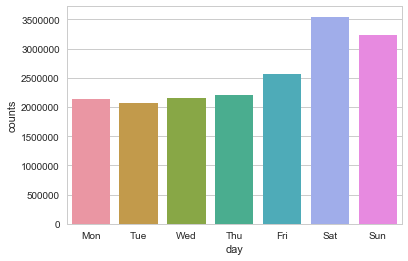

In [33]:
day_counts_df = pd.DataFrame()
day_counts_df['day'] = day_counts.keys()
day_counts_df['counts'] = day_counts.values()
sns.set(style="whitegrid")
ax = sns.barplot(x="day", y="counts", data=day_counts_df)

## Arizona restaurant checkins each day

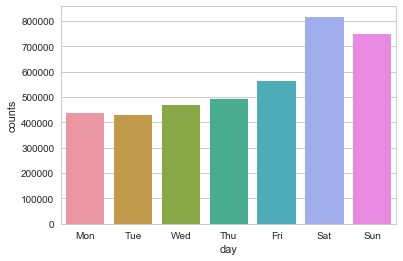

In [35]:
az_day_counts_df = pd.DataFrame()
az_day_counts_df['day'] = day_counts_az.keys()
az_day_counts_df['counts'] = day_counts_az.values()
sns.set(style="whitegrid")
ax = sns.barplot(x="day", y="counts", data=az_day_counts_df)

## Number of checkins at restaruants through the day

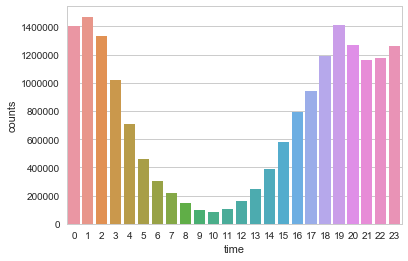

In [34]:
time_counts_df = pd.DataFrame()
time_counts_df['time'] = time_counts.keys()
time_counts_df['counts'] = time_counts.values()
sns.set(style="whitegrid")
ax = sns.barplot(x="time", y="counts", data=time_counts_df)

## Arizona restaurant checkins through the day

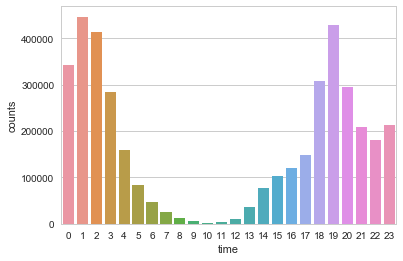

In [36]:
time_counts_df_az = pd.DataFrame()
time_counts_df_az['time'] = time_counts_az.keys()
time_counts_df_az['counts'] = time_counts_az.values()
sns.set(style="whitegrid")
ax = sns.barplot(x="time", y="counts", data=time_counts_df_az)

In [35]:
time_counts

{0: 1399692,
 1: 1468658,
 2: 1330682,
 3: 1018358,
 4: 706797,
 5: 460937,
 6: 306156,
 7: 219808,
 8: 143981,
 9: 94903,
 10: 82273,
 11: 103046,
 12: 164853,
 13: 249412,
 14: 390986,
 15: 578049,
 16: 793502,
 17: 939283,
 18: 1192090,
 19: 1412009,
 20: 1267435,
 21: 1159676,
 22: 1175327,
 23: 1257971}

In [22]:
cs = 100000
count = 0
fn = "yelp_gcs/yelp_academic_dataset_review.csv"
stars = {x:0 for x in range(0, 6)}
for chunk in pd.read_csv(fn, chunksize = cs):
    count += cs
    print(count)
    for index, row in chunk.sample(frac=0.1, replace=False, random_state=1).iterrows():
        try:
            stars[row['stars']] += 1
        except KeyError:
            print(row['stars'])

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000


## 6,000,000 rows of reviews

In [23]:
print("Stars", stars)

Stars {0: 0, 1: 86035, 2: 48526, 3: 67422, 4: 133632, 5: 264085}


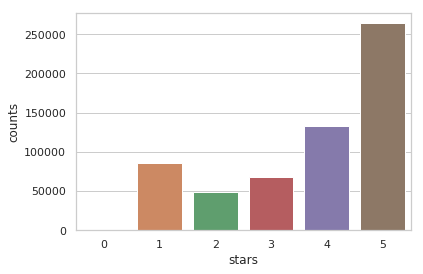

In [28]:
star_counts_df = pd.DataFrame()
star_counts_df['stars'] = stars.keys()
star_counts_df['counts'] = stars.values()
sns.set(style="whitegrid")
ax = sns.barplot(x="stars", y="counts", data=star_counts_df)

## 600k reviews

## More 5 star reviews, but also a lot of 1 star reviews

In [3]:
import xgboost as xgb
import pandas as pd
import numpy as np
import json
from sklearn import preprocessing
import ast

## Predict Business Stars from the data

## TODO: Need to convert everything to numeric data

In [4]:
fn = "yelp_dataset/yelp_academic_dataset_business.csv"

In [5]:
df_original = pd.read_csv(fn)
df = df_original.copy()

## One hot encode the dataset features

In [6]:
df_json = pd.read_json("yelp_dataset/yelp_academic_dataset_business.json", lines=True)

In [7]:
print(df_json.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')


city
state
attributes (only dictionary)
categories

## Attributes is the main dictionary

In [8]:
# Parse the dictionary within dictionaries
def get_val(val, route):
    if isinstance(val, dict):
        for key in val.keys():
            get_val(val[key], route + "_" + key)
    elif isinstance(val, str) and val[0] == "{":
        val = ast.literal_eval(val)
        for key in val.keys():
            get_val(val[key], route + "_" + key)
    else:
        feature_hot.add(route + "_" + str(val))
feature_hot = set()
for index, row in df_json.iterrows():
    get_val(row['attributes'], "")

In [10]:
feature_d = {}
for feature in feature_hot:
    feature_d[feature] = []
for index, row in df_json.iterrows():
    row = row['attributes']
    if row:
        row = str(row)
        #print("\n", "row", row)
        for feature in feature_d.keys():
            #print("feature", feature, "\n")
            feature_split = feature.split("_")[1:]
            #print("feature split", feature_split)
            count = 0
            for fs in feature_split:
                if fs not in row:
                    feature_d[feature].append(0)
                    count = 1
                    break
            if count == 0:
                #print("found feature")
                feature_d[feature].append(1)
    else:
        for feature in feature_d.keys():
            feature_d[feature].append(0)

In [11]:
feature_d

{'_BestNights_sunday_False': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [12]:
df_new = pd.DataFrame()
for key in feature_d.keys():
    df_new[key[1:]] = feature_d[key]
#df_new['city'] = df['city']
#df_new['state'] = df['state']
df_new['is_open'] = df['is_open']
df_new['stars'] = df['stars']

In [13]:
df_new.head()

,BestNights_sunday_False,RestaurantsPriceRange2_2,HairSpecializesIn_kids_False,BYOB_True,Ambience_classy_False,DietaryRestrictions_vegan_False,GoodForMeal_dinner_False,HairSpecializesIn_kids_True,NoiseLevel_very_loud,BusinessParking_garage_False,...,Corkage_False,BYOBCorkage_yes_corkage,OutdoorSeating_True,Ambience_upscale_True,Ambience_touristy_True,GoodForDancing_False,RestaurantsGoodForGroups_True,WiFi_free,is_open,stars
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,4.0
1,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,4.5
2,0,1,0,0,1,0,1,0,0,1,...,0,0,1,1,1,0,1,1,0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.0


In [14]:
#features = key_l
#features.append('latitude')
#features.append('longitude')
#features.append('is_open')
target = 'stars'

In [15]:
# city, stars, categories
le = preprocessing.LabelEncoder()
le.fit(df_new['stars'])
le.transform(df_new['stars'])

array([6, 7, 6, ..., 4, 6, 6], dtype=int64)

In [16]:
le = preprocessing.LabelEncoder()
le.fit(df_new['stars'])
le.transform(df_new['stars'])

array([6, 7, 6, ..., 4, 6, 6], dtype=int64)

In [21]:
from sklearn.preprocessing import LabelEncoder
le_city, le_state = LabelEncoder(), LabelEncoder()
df_new['city'] = le_city.fit_transform(df_json.city)
df_new['state'] = le_city.fit_transform(df_json.state)
df_new.head()

,BestNights_sunday_False,RestaurantsPriceRange2_2,HairSpecializesIn_kids_False,BYOB_True,Ambience_classy_False,DietaryRestrictions_vegan_False,GoodForMeal_dinner_False,HairSpecializesIn_kids_True,NoiseLevel_very_loud,BusinessParking_garage_False,...,OutdoorSeating_True,Ambience_upscale_True,Ambience_touristy_True,GoodForDancing_False,RestaurantsGoodForGroups_True,WiFi_free,is_open,stars,city,state
0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,4.0,122,6
1,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,4.5,334,41
2,0,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,0,4.0,559,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.5,706,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.0,122,6


In [25]:
from sklearn.preprocessing import OneHotEncoder
city_one, state_one = OneHotEncoder(), OneHotEncoder()
X = city_one.fit_transform(df_new.city.values.reshape(-1,1)).toarray()
Xm = state_one.fit_transform(df_new.state.values.reshape(-1,1)).toarray()

In [27]:
dfOneHot = pd.DataFrame(X, columns = ["city_"+str(int(i)) for i in range(X.shape[1])])
df_new = pd.concat([df_new, dfOneHot], axis=1)

In [28]:
dfOneHot = pd.DataFrame(Xm, columns = ["state_"+str(int(i)) for i in range(Xm.shape[1])])
df_new = pd.concat([df_new, dfOneHot], axis=1)

In [29]:
df_new.columns

Index(['BestNights_sunday_False', 'RestaurantsPriceRange2_2',
       'HairSpecializesIn_kids_False', 'BYOB_True', 'Ambience_classy_False',
       'DietaryRestrictions_vegan_False', 'GoodForMeal_dinner_False',
       'HairSpecializesIn_kids_True', 'NoiseLevel_very_loud',
       'BusinessParking_garage_False',
       ...
       'state_59', 'state_60', 'state_61', 'state_62', 'state_63', 'state_64',
       'state_65', 'state_66', 'state_67', 'state_68'],
      dtype='object', length=1357)

In [30]:
df_sample = df_new.sample(frac=1)
splits = [0.8, 0.8]
# Training data is 80% of the data
labels = df_sample[target]
training_data = df_sample[:int(splits[0] * len(df_sample))]

In [31]:
print(labels)

7063      5.0
182323    4.5
12427     5.0
83167     1.5
145850    4.5
91344     4.5
63587     4.0
143848    3.5
165299    3.5
71209     4.5
52789     4.0
168488    4.0
132325    5.0
138965    4.0
57428     1.5
170692    3.5
21944     3.5
163647    4.0
68055     2.0
168553    4.5
31331     4.0
180682    1.5
31513     3.5
46869     5.0
5285      3.5
121413    2.5
127182    3.5
50727     4.0
50413     5.0
50701     3.0
         ... 
162244    3.5
115376    3.5
138121    5.0
187521    4.5
137524    5.0
68766     3.0
2629      3.0
91840     3.5
71879     2.0
144385    5.0
106867    2.0
125346    3.5
74567     3.0
72036     3.5
101875    2.5
107411    5.0
68999     5.0
132648    3.0
7447      4.0
121729    4.5
80042     5.0
109874    5.0
25040     3.5
133954    3.5
13404     4.5
173820    3.0
49212     3.5
41518     3.5
66920     3.5
104050    3.5
Name: stars, Length: 188593, dtype: float64


In [32]:
training_data = training_data.drop(columns=['stars'])

In [33]:
# Data used for training is 80% of the training data
training_labels = labels[:int(splits[1] * len(df_sample))]
dtrain = xgb.DMatrix(training_data[:int(splits[1] * len(training_data))], label=training_labels[:int(splits[1] * len(training_data))])

In [34]:
# 9 different star ratings
# 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5 stars
print("Unique Stars", "\n", labels.unique())
# Validation is 20% of the training
x_val = training_data[int(splits[1] * len(training_data)):]
y_val = training_labels[int(splits[1] * len(training_data)):]
# Test data is 20% of the entire data
x_test = df_sample[int(splits[0] * len(df_sample)):].drop(columns=['stars'])
y_test = labels[int(splits[0] * len(df_sample)):]
dtest = xgb.DMatrix(x_test)

Unique Stars 
 [5.  4.5 1.5 4.  3.5 2.  2.5 3.  1. ]


In [ ]:
param = {'max_depth': 20, 'eta': 0.1, 'silent': 1, 'objective': 'multi:softprob', 'gamma': 5}
param['nthread'] = 4
param['eval_metric'] = 'mlogloss'
param['num_class'] = 9
dval = xgb.DMatrix(x_val, label=y_val)
evallist = [(dval, 'eval'), (dtrain, 'train')]
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)
bst.save_model('xgboost.model')

[0]	eval-mlogloss:2.10163	train-mlogloss:2.09642
[1]	eval-mlogloss:2.02287	train-mlogloss:2.01434
[2]	eval-mlogloss:1.95605	train-mlogloss:1.94483
[3]	eval-mlogloss:1.89825	train-mlogloss:1.88487
[4]	eval-mlogloss:1.84794	train-mlogloss:1.83266


In [ ]:
bst = xgb.Booster({'nthread': 4})  # init model
try:
    bst.load_model('xgboost.model')  # load data
except:
    print("couldn't load model")

In [ ]:
y_pred = bst.predict(dtest)
# I take the highest probability for each class prediction for each example as the prediction.
predictions = []
true = list(y_test)
for i in range(len(y_pred)):
    predictions.append(np.argmax(y_pred[i]))
print("predictions", predictions[:100])
print("real", true[:100])
# evaluate predictions
accuracy = 0
for i in range(len(predictions)):
    if predictions[i] == true[i]:
        accuracy += 1
print(accuracy / len(predictions))

In [55]:
# # Plotting
# ax = xgb.plot_importance(bst)
# fig = ax.figure
# fig.set_size_inches(10, 10)